# GD - Exercise $\dots$

This exercise is intended to create a perceptron with a gradient descent approach to solve a binary classification problem with synthetic data generation

## Dataset

Each class will have exactly $370$ data points and the seed should be set to $703$.

Let's define the first class $X_1$:
- $X_1^1$ is an exponential distribution with a scale factor of 13
- $X_1^2$ is an exponential distribution with a scale factor of 7

The second class $X_2$ is defined as follows:
- $X_2^1$ is a negative exponential distribution with a scale factor of 13 and a shifting of 70
- $X_2^2$ is a negative exponential distribution with a scale factor of 7 and a shifting of 35

The class $X_1$ will have the label "+1" meanwhile $X_2$ will have the label "-1"

In [62]:
import numpy as np

# set seed
np.random.seed(703)

# number of samples
N = 370

# class 1
X1_1 = np.random.exponential(scale=13, size=N)
X1_2 = np.random.exponential(scale=7, size=N)

# class 1
X2_1 = - np.random.exponential(scale=13, size=N) + 70
X2_2 = - np.random.exponential(scale=7, size=N) + 35

# labels
Y1 = np.ones(N)
Y2 = - np.ones(N)

Plot the generated dataset using the <tt>scatter</tt> function

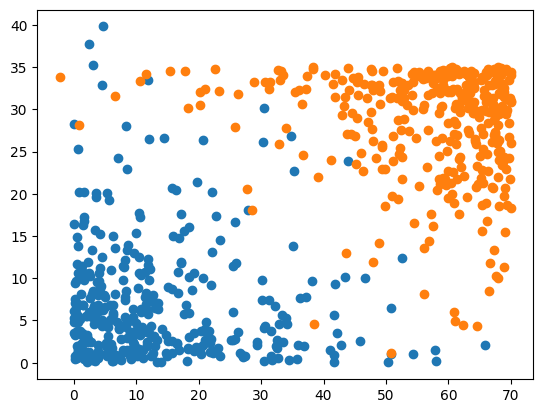

In [63]:
import matplotlib.pyplot as plt

# display class 1
plt.scatter(X1_1, X1_2)

# display class 2
plt.scatter(X2_1, X2_2)

Create the dataset $X$ by concatenating $X_1$ and $X_2$ and the bias $X_0$. Do the same to create the labels $Y$

In [64]:
# bias
X0 = np.ones(2 * N)

# feature X1
X1 = np.concatenate((X1_1, X2_1))

# feature X2
X2 = np.concatenate((X1_2, X2_2))

# dataset X
X = np.stack((X0, X1, X2), axis=1)

# label vector y
y = np.concatenate((Y1, Y2))


### Error function

Define the error function as the _Sum Squared Error_ which is: $\frac{1}{2}\sum_{i = 1}^N(\text{e}_i)^2$, where $e$ is the error vector

In [65]:
def sse(X:np.matrix, y:np.array, w:np.array) -> float:
    return np.sum( np.square(y - np.dot(X, w)) ) / 2

## Learning

Set up the vector of weight $w$ as a uniform distribution from 0 to 1 then train the Perceptron model using the gradient descent approach, implementing the following requirements
- set parameter $\eta$ to $10^{-4}$
- set the maximum number of epochs to $400$

In addition, note that we want to keep track of the errors per epoch. Store in a vector named <tt>errors_epoch</tt> the number of misclassified objects for each epoch and in another vector<tt>sse_epoch</tt>, the sum of squared errors per each epoch


In [66]:
# weight vector
w = np.random.uniform(low=0, high=1, size=X.shape[1])

# learning rate
eta = 1e-4

# epochs
max_epochs = 400
current_epoch = 0

# errors
sse_epoch = np.zeros(max_epochs)
errors_epoch = np.zeros(max_epochs)

# training
while current_epoch < max_epochs:

    # save sum of squared errors
    sse_epoch[current_epoch] = sse(X, y, w)

    # errors per epoch
    errors_epoch[current_epoch] = np.sum( y * np.sign( np.dot(X, w) ) < 0 )

    # update rule
    w += 2 * eta * np.dot(np.transpose(X), y - np.dot(X, w)) / X.shape[0]

    current_epoch += 1


Display raw the plots containing the solution found.

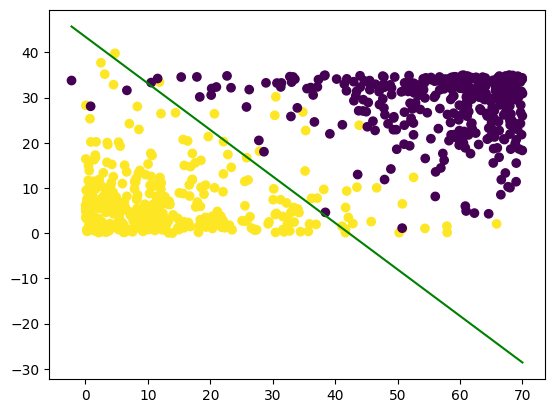

In [67]:
# display datas
plt.scatter(X[:, 1], X[:, 2], c=y)

# plot the line
plt.plot([ np.min(X[:, 1]), np.max(X[:, 1]) ],
         [ - np.min(X[:, 1]) * w[1]/w[2] - w[0]/w[2], - np.max(X[:, 1]) * w[1]/w[2] - w[0]/w[2] ],
         color='green' )

Display the two error plots using the two error vectors

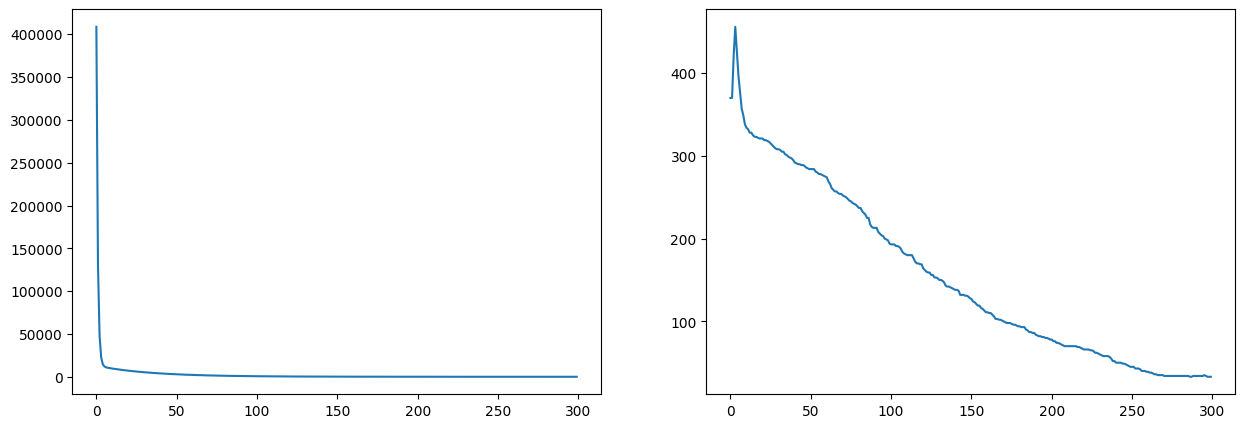

In [68]:
# subplot
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# sum of squared errors per epoch
axs[0].plot(range(sse_epoch.size), sse_epoch)

# errors per epoch
axs[1].plot(range(errors_epoch.size), errors_epoch)